In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_excel('chapt26.xlsx', sheet_name='Data', index_col=0, header=2)
df = df.iloc[5:-7]
df = df.loc[1889:]
df['dc'] = df['C'].shift(-1) / df['C'] - 1

df['consumption_deflator'] = df['CPI'] / df.loc[1972, 'CPI']
df['p_real'] = df['P'] / df['consumption_deflator']
df['d_real'] = df['D'] / df['consumption_deflator']
df['rs'] = (df['p_real'].shift(-1) + df['d_real'] - df['p_real']) / df['p_real']
df['rb'] = df['RealR'] - 1

Text(0.5, 1.0, 'Real prices of S&P 500 (replicates Grossman and Shiller 1981, p. 225, fig. 1)')

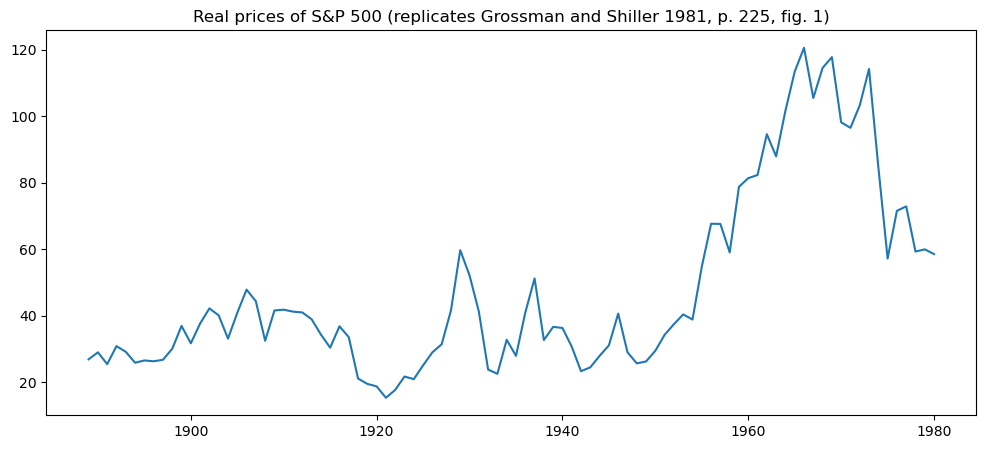

In [3]:
plt.figure(figsize=(12, 5))
df.loc[:1980, 'p_real'].plot()
plt.title('Real prices of S&P 500 (replicates Grossman and Shiller 1981, p. 225, fig. 1)')

In [4]:
df = df.loc[:, ["rs", "rb", "dc"]].astype(float)

Text(0.5, 1.0, 'Annual Real Per Capita Consumption Growth (replicates Kocherlakota 1996, p. 45, fig. 1)')

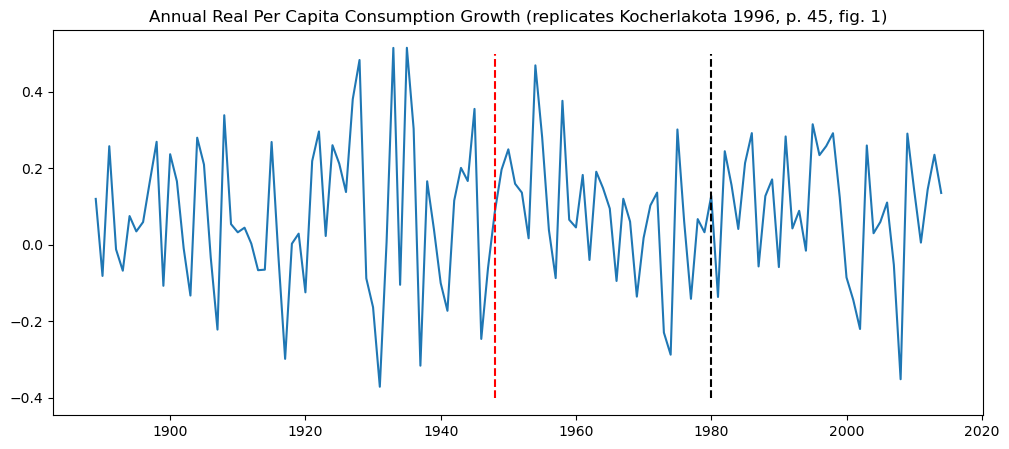

In [5]:
plt.figure(figsize=(12, 5))
df.loc[:, 'rs'].plot()
plt.vlines(1980, -.4, .5, color='k', linestyles='dashed')
plt.vlines(1948, -.4, .5, color='r', linestyles='dashed')
plt.title('Annual Real Per Capita Consumption Growth (replicates Kocherlakota 1996, p. 45, fig. 1)')

Text(0.5, 1.0, 'Annual Real Return to S&P 500 (replicates Kocherlakota 1996, p. 46, fig. 2)')

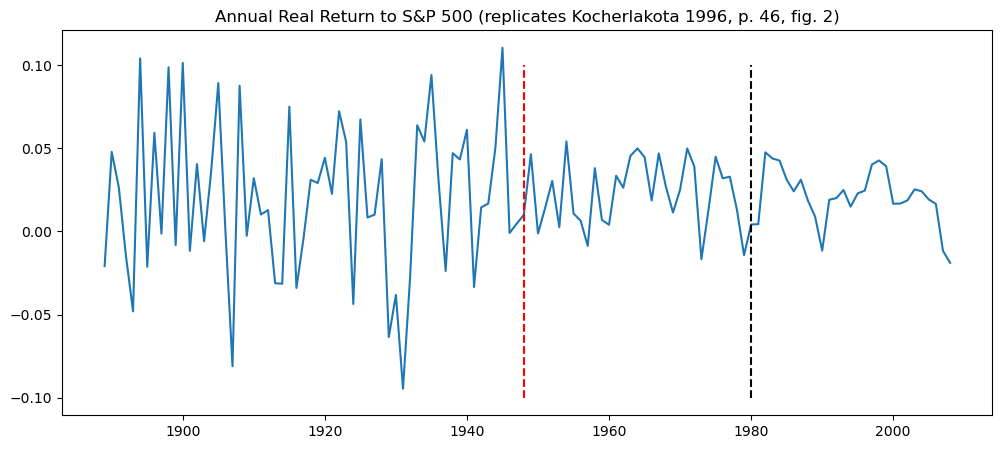

In [6]:
plt.figure(figsize=(12, 5))
df.loc[:, 'dc'].plot()
plt.vlines(1980, -.1, .1, color='k', linestyles='dashed')
plt.vlines(1948, -.1, .1, color='r', linestyles='dashed')
plt.title('Annual Real Return to S&P 500 (replicates Kocherlakota 1996, p. 46, fig. 2)')

Text(0.5, 1.0, 'Real Return to Nominally Risk Free Short Termn Debt (replicates Kocherlakota 1996, p. 46, fig. 3)')

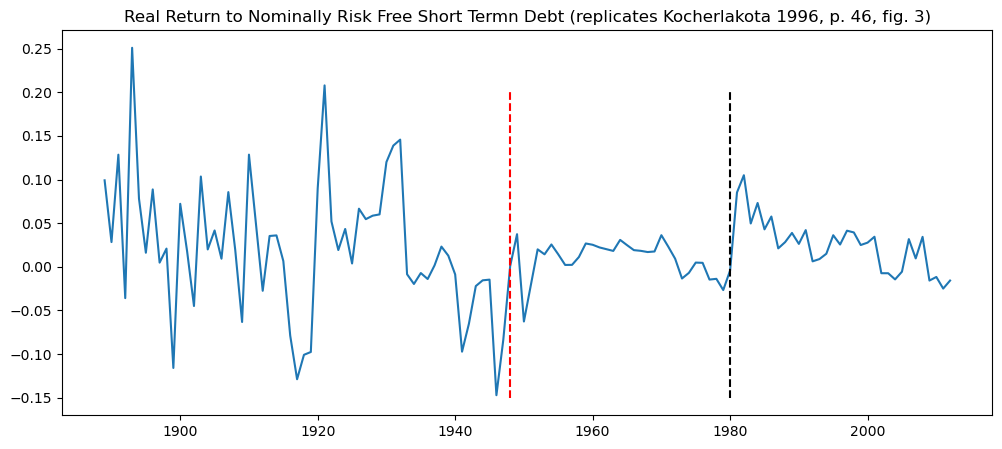

In [7]:
plt.figure(figsize=(12, 5))
df.loc[:, 'rb'].plot()
plt.vlines(1980, -.15, .2, color='k', linestyles='dashed')
plt.vlines(1948, -.15, .2, color='r', linestyles='dashed')
plt.title('Real Return to Nominally Risk Free Short Termn Debt (replicates Kocherlakota 1996, p. 46, fig. 3)')

In [8]:
print('Table 1')
print('------------------------------------------')
print(df.loc[:1980].mean().to_string())
print('------------------------------------------')
print(df.loc[:1980].cov().to_string())

Table 1
------------------------------------------
rs    0.075369
rb    0.016636
dc    0.020612
------------------------------------------
          rs        rb        dc
rs  0.035446  0.001137  0.004302
rb  0.001137  0.004152 -0.000210
dc  0.004302 -0.000210  0.001585


In [9]:
df1 = df.loc[1948:, ['rb', 'rs', 'dc']].dropna() + 1

In [10]:
a = np.linspace(0, 10, 21)
e = np.array([])
t = np.array([])

for a_ in a:
    e_ = df1['dc'] ** (-a_) * (df1['rs'] - df1['rb'])
    e = np.append(e, e_.mean())

    t_ = e_.mean() / e_.std() * np.sqrt(len(e_))
    t = np.append(t, t_)

table_2 = pd.DataFrame({
    'alpha': a,
    'Sample Mean': e,
    't-stat': t
})

In [11]:
table_2

,alpha,Sample Mean,t-stat
0,0.0,0.062647,2.996122
1,0.5,0.061276,2.959140
2,1.0,0.059929,2.921651
3,1.5,0.058605,2.883670
4,2.0,0.057305,2.845215
5,2.5,0.056028,2.806304
6,3.0,0.054773,2.766956
7,3.5,0.053540,2.727188
8,4.0,0.052327,2.687020
9,4.5,0.051136,2.646472


In [12]:
a = np.linspace(0, 10, 21)
e = np.array([])
t = np.array([])
beta = .99

for a_ in a:
    e_ = beta * df1['dc'] ** (-a_) * df1['rb'] - 1
    e = np.append(e, e_.mean())

    t_ = e_.mean() / e_.std() * np.sqrt(len(e_))
    t = np.append(t, t_)

table_3 = pd.DataFrame({
    'alpha': a,
    'Sample Mean': e,
    't-stat': t
})

In [13]:
table_3

,alpha,Sample Mean,t-stat
0,0.0,0.008767,2.627748
1,0.5,-0.002079,-0.671291
2,1.0,-0.012729,-3.887706
3,1.5,-0.023187,-6.113461
4,2.0,-0.033456,-7.398854
5,2.5,-0.043541,-8.116550
6,3.0,-0.053443,-8.529992
7,3.5,-0.063167,-8.779643
8,4.0,-0.072715,-8.937252
9,4.5,-0.082092,-9.040448


In [14]:
a = np.linspace(0.5, 18, 36)
rho = np.array([])
beta = .99

for a_ in a:
    rho_ = a_ + (1 - a_) * (np.log(beta) + np.log((df1['dc'] ** (-a_) * df1['rb']).mean())) / np.log((df1['dc'] ** (1 - a_)).mean())
    rho = np.append(rho, rho_)

table_4 = pd.DataFrame({
    'alpha': a,
    '1/alpha': 1/a,
    '1/rho': 1/rho
})

In [15]:
table_4

,alpha,1/alpha,1/rho
0,0.5,2.000000,2.476747
1,1.0,1.000000,NaN
2,1.5,0.666667,2.458394
3,2.0,0.500000,2.449075
4,2.5,0.400000,2.439662
5,3.0,0.333333,2.430157
6,3.5,0.285714,2.420561
7,4.0,0.250000,2.410875
8,4.5,0.222222,2.401101
9,5.0,0.200000,2.391240
